# Interactive visualization of topographic maps

This interactive notebook allows for interactive visualization of polar angle, polar angle gradients, and visual field sign maps as a function of the participant’s assignment to the reported clusters. 

## General settings

In [1]:
import numpy as np
import pandas as pd
import random
import sys

sys.path.append('../')

from figures.polarAngle_maps import polarAngle_plot
from functions.gradientAnalysis import PA_gradients, fieldSign
from ipywidgets import interact, Dropdown

In [2]:
# All individuals
with open('./../list_subj.txt') as fp:
    subjects = fp.read().split("\n")
list_of_subs = np.array(subjects[0:len(subjects) - 1])

# Cluster assignment
cluster_assignment = np.load('./../output/clusters_individualIndeces_PA.npz')['list']

clusters = {}
for i in np.unique(cluster_assignment):
    clusters['cluster_' + str(i + 1)] = list(list_of_subs[cluster_assignment == i])

## Cluster assignment

Here is an interactive visualization function for visually inspecting left hemisphere polar angle maps in early visual cortex. Note that for the interactive visualization to behave appropriately, i.e., updating the list of indices given the cluster choice, you should run the cell containing the plotting function should be last to be run.

In [3]:
cluster_index = Dropdown(options = clusters.keys())
subject_index= Dropdown()
dorsal_roi = Dropdown(options = [False, True])
binarize = Dropdown(options = [False, True])

@interact(cluster = cluster_index, index = subject_index, dorsal_roi = dorsal_roi, binarize = binarize)
def plot1(cluster, index, dorsal_roi, binarize):
    subject_index.options = clusters[cluster]
    print('Number of participants in this cluster: ' + str(len(subject_index.options)))
    if index == None:
        return 'Select a cluster and a subject'
    else:
        return polarAngle_plot(index, './../data', dorsal_only = dorsal_roi, binarize = binarize)

interactive(children=(Dropdown(description='cluster', options=('cluster_1', 'cluster_2', 'cluster_3', 'cluster…

To generate the average maps from each cluster, you may uncomment and run the following cell.

In [3]:
# %%bash
# cd ./../figures/
# python mode_PA_DorsalEarlyVisualCortex_maps.py --binarize True

To generate the average maps shown in in Supplementary Figure 3, you may uncomment and run the following cell.

In [2]:
# %%bash
# cd ./../functions/
# python clustering.py

In [1]:
# %%bash
# cd ./../figures/
# python mode_PA_meanMaps.py --hemisphere 'RH' --modality 'polarAngle'

# Streamline plot of polar angle gradients

Here is an interactive visualization function for visually inspecting polar angle gradients in early visual cortex. Note that these plots have a different orientation from the previous one, but they are colored the same way.

In [7]:
cluster_index = Dropdown(options = clusters.keys())
subject_index= Dropdown()
dorsal_roi = Dropdown(options = [False, True])
binarize = Dropdown(options = [False, True])
plot_type = Dropdown(options = ['streamplot', 'quiver'])


@interact(cluster = cluster_index, index = subject_index, dorsal_roi=dorsal_roi, binarize = binarize , plot_type = plot_type)
def plot2(cluster, index, dorsal_roi, plot_type, binarize):
    subject_index.options = clusters[cluster]
    if index == None:
        return 'Select a cluster and a subject'
    else:
        return PA_gradients(index, './../data', plot_type = plot_type, binarize = binarize, dorsal_only=dorsal_roi)

interactive(children=(Dropdown(description='cluster', options=('cluster_1', 'cluster_2', 'cluster_3', 'cluster…

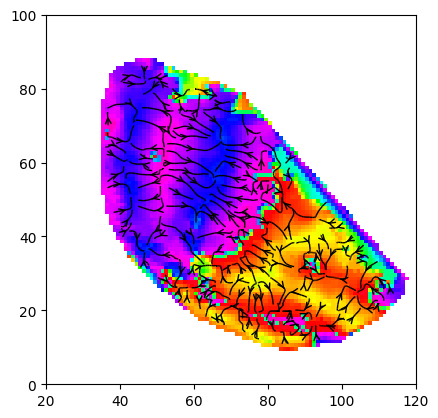

In [15]:
# check
PA_gradients('581450', './../data', dorsal_only=False)

# Visual field sign analysis

Here is an interactive visualization function for visually inspecting visual field signs in early visual cortex.

In [8]:
cluster_index = Dropdown(options = clusters.keys())
subject_index= Dropdown()
dorsal_roi = Dropdown(options = [False, True])


@interact(cluster = cluster_index, index = subject_index, dorsal_roi = dorsal_roi)
def plot3(cluster, index, dorsal_roi):
    subject_index.options = clusters[cluster]
    if index == None:
        return 'Select a cluster and a subject'
    else:
        return fieldSign(index, path='./../data', dorsal_only=dorsal_roi)

interactive(children=(Dropdown(description='cluster', options=('cluster_1', 'cluster_2', 'cluster_3', 'cluster…

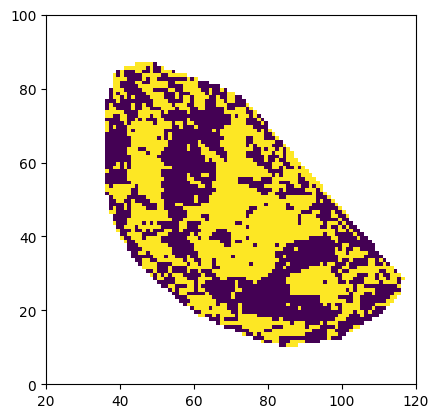

In [14]:
# check
fieldSign('581450', './../data', dorsal_only=False)

In [ ]:
# # Random sample for Supplementary Figure 3, 5, 6, 7, 8
# random.seed('123')
# random.sample(clusters['cluster_6'],9)